<a href="https://colab.research.google.com/github/manhduc07/LMAO/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Viết mô hình Linear Regession bằng Pytorch

In [71]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt

In [72]:
# --- Cài đặt ngẫu nhiên và tạo dữ liệu ---
torch.manual_seed(42)  # Đặt seed cho kết quả nhất quán

# Tạo dữ liệu giả định với độ nhiễu
X = 10 * torch.rand(100, 1)  # Trực tiếp tạo tensor PyTorch
y = 2 * X + 3 + 0.2 * torch.randn(100, 1)


In [73]:
# --- Mô hình hoá ---
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()  # Sử dụng cú pháp kế thừa hiện đại
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

In [74]:
# --- Chuẩn bị và huấn luyện ---
input_size = 1
output_size = 1
model = LinearRegression(input_size, output_size)

In [75]:
# Sử dụng Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

num_epochs = 10000
for epoch in range(num_epochs):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/10000], Loss: 61.2106
Epoch [200/10000], Loss: 13.4544
Epoch [300/10000], Loss: 2.2157
Epoch [400/10000], Loss: 0.5329
Epoch [500/10000], Loss: 0.3539
Epoch [600/10000], Loss: 0.3164
Epoch [700/10000], Loss: 0.2867
Epoch [800/10000], Loss: 0.2577
Epoch [900/10000], Loss: 0.2296
Epoch [1000/10000], Loss: 0.2030
Epoch [1100/10000], Loss: 0.1780
Epoch [1200/10000], Loss: 0.1550
Epoch [1300/10000], Loss: 0.1342
Epoch [1400/10000], Loss: 0.1156
Epoch [1500/10000], Loss: 0.0993
Epoch [1600/10000], Loss: 0.0852
Epoch [1700/10000], Loss: 0.0731
Epoch [1800/10000], Loss: 0.0630
Epoch [1900/10000], Loss: 0.0546
Epoch [2000/10000], Loss: 0.0479
Epoch [2100/10000], Loss: 0.0424
Epoch [2200/10000], Loss: 0.0382
Epoch [2300/10000], Loss: 0.0349
Epoch [2400/10000], Loss: 0.0325
Epoch [2500/10000], Loss: 0.0306
Epoch [2600/10000], Loss: 0.0293
Epoch [2700/10000], Loss: 0.0284
Epoch [2800/10000], Loss: 0.0277
Epoch [2900/10000], Loss: 0.0273
Epoch [3000/10000], Loss: 0.0270
Epoch [3100/10000

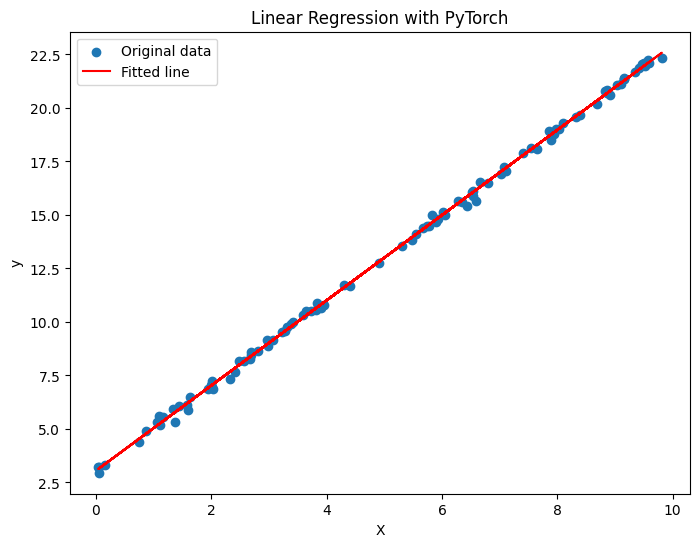

In [76]:
# --- Đánh giá và trực quan hóa ---
with torch.no_grad():  # Ngăn chặn tính toán gradient trong quá trình đánh giá
    predicted = model(X).numpy()  # Chuyển tiếp một lần nữa và chuyển sang NumPy

plt.figure(figsize=(8, 6))
plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with PyTorch')
plt.legend()
plt.show()

 Viết mô hình Lgistic Regession bằng Pytorch

In [77]:
# Create data (Seeding for consistent results)
np.random.seed(42)
X = 10 * np.random.rand(100, 2)  # 100 data points with 2 features
y = (X[:, 0] + X[:, 1] > 10).astype(int)  # Label based on linear relationship


In [78]:
# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [79]:
# Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Linear layer with 1 output

    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Apply sigmoid activation

In [80]:
# Model and Hyperparameters
input_size = 2
model = LogisticRegression(input_size)


In [81]:
# Loss function and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy for Logistic Regression
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent

In [82]:
# Training Loop
num_epochs = 10000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/10000], Loss: 0.5742
Epoch [200/10000], Loss: 0.5550
Epoch [300/10000], Loss: 0.5389
Epoch [400/10000], Loss: 0.5238
Epoch [500/10000], Loss: 0.5096
Epoch [600/10000], Loss: 0.4964
Epoch [700/10000], Loss: 0.4840
Epoch [800/10000], Loss: 0.4723
Epoch [900/10000], Loss: 0.4613
Epoch [1000/10000], Loss: 0.4509
Epoch [1100/10000], Loss: 0.4412
Epoch [1200/10000], Loss: 0.4320
Epoch [1300/10000], Loss: 0.4232
Epoch [1400/10000], Loss: 0.4150
Epoch [1500/10000], Loss: 0.4072
Epoch [1600/10000], Loss: 0.3997
Epoch [1700/10000], Loss: 0.3927
Epoch [1800/10000], Loss: 0.3860
Epoch [1900/10000], Loss: 0.3796
Epoch [2000/10000], Loss: 0.3735
Epoch [2100/10000], Loss: 0.3676
Epoch [2200/10000], Loss: 0.3621
Epoch [2300/10000], Loss: 0.3567
Epoch [2400/10000], Loss: 0.3516
Epoch [2500/10000], Loss: 0.3467
Epoch [2600/10000], Loss: 0.3421
Epoch [2700/10000], Loss: 0.3375
Epoch [2800/10000], Loss: 0.3332
Epoch [2900/10000], Loss: 0.3291
Epoch [3000/10000], Loss: 0.3251
Epoch [3100/10000],

Accuracy: 0.51


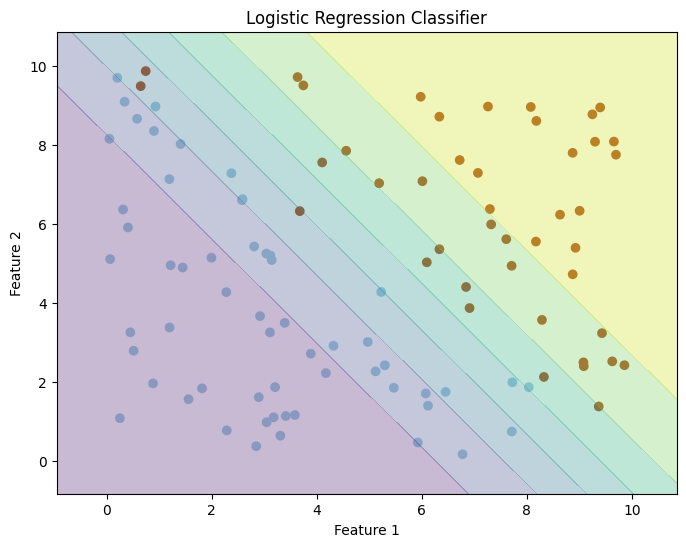

In [83]:
# Evaluation
with torch.no_grad():
    predicted = model(X_tensor).numpy()
    predicted_class = (predicted > 0.5).astype(int)  # Thresholding for class prediction
    accuracy = np.mean(predicted_class == y)
    print(f'Accuracy: {accuracy:.2f}')

# Visualization (Decision Boundary)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)  # Scatter plot with color-coded labels

# Define ranges for plotting the decision boundary
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a mesh grid for evaluation across the feature space
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
grid_tensor = torch.tensor(np.c_[xx1.ravel(), xx2.ravel()], dtype=torch.float32)

# Get predictions for the mesh grid points
Z = model(grid_tensor).detach().numpy()
Z = Z.reshape(xx1.shape)

# Plot the decision boundary based on predicted probabilities
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Classifier')
plt.show()

Viết chương trình xử lý dữ liệu sau với Pytorch(bảng giá trị cho trong file đính kèm)

In [84]:
# Dữ liệu đầu vào
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
# Kết quả mong muốn
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [85]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(2, 1) # Lớp tuyến tính

    def forward(self, x):
        x = self.fc(x)
        return x

In [86]:
# Khởi tạo mô hình
model = SimpleNN()

# Định nghĩa hàm loss và bộ tối ưu hóa
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [90]:
# Huấn luyện mô hình
for epoch in range(100000):
    # Forward pass
    outputs = model(X)
    # Tính loss
    loss = criterion(outputs, y)
    # Backward pass và cập nhật trọng số
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch+1}/10000, Loss: {loss.item():.4f}')

Epoch 1/10000, Loss: 0.2500
Epoch 1001/10000, Loss: 0.2500
Epoch 2001/10000, Loss: 0.2500
Epoch 3001/10000, Loss: 0.2500
Epoch 4001/10000, Loss: 0.2500
Epoch 5001/10000, Loss: 0.2500
Epoch 6001/10000, Loss: 0.2500
Epoch 7001/10000, Loss: 0.2500
Epoch 8001/10000, Loss: 0.2500
Epoch 9001/10000, Loss: 0.2500
Epoch 10001/10000, Loss: 0.2500
Epoch 11001/10000, Loss: 0.2500
Epoch 12001/10000, Loss: 0.2500
Epoch 13001/10000, Loss: 0.2500
Epoch 14001/10000, Loss: 0.2500
Epoch 15001/10000, Loss: 0.2500
Epoch 16001/10000, Loss: 0.2500
Epoch 17001/10000, Loss: 0.2500
Epoch 18001/10000, Loss: 0.2500
Epoch 19001/10000, Loss: 0.2500
Epoch 20001/10000, Loss: 0.2500
Epoch 21001/10000, Loss: 0.2500
Epoch 22001/10000, Loss: 0.2500
Epoch 23001/10000, Loss: 0.2500
Epoch 24001/10000, Loss: 0.2500
Epoch 25001/10000, Loss: 0.2500
Epoch 26001/10000, Loss: 0.2500
Epoch 27001/10000, Loss: 0.2500
Epoch 28001/10000, Loss: 0.2500
Epoch 29001/10000, Loss: 0.2500
Epoch 30001/10000, Loss: 0.2500
Epoch 31001/10000, Lo

In [88]:
# Kiểm tra dự đoán
with torch.no_grad():
    predicted = model(X)
    predicted = predicted.round() # Làm tròn dự đoán về 0 hoặc 1
    print(f'Kết quả dự đoán:\n{predicted}')


Kết quả dự đoán:
tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [89]:
# Lưu mô hình
torch.save(model.state_dict(), 'xor_model_simple.pth')